<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load the Life expectancy dataset and display the first five records 

In [ ]:
df= pd.read_csv('/content/Life_Expectancy (1).csv')
print(df.shape)
df.head()

(182, 20)


,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [ ]:
# check the size of the dataframe

# type your code here

In [ ]:
df.info

<bound method DataFrame.info of          Country  Year      Status  ...  Income_Index  Schooling  Life_Expectancy
0    Afghanistan  2015  Developing  ...         0.479       10.1             65.0
1        Albania  2015  Developing  ...         0.762       14.2             77.8
2        Algeria  2015  Developing  ...         0.743       14.4             75.6
3         Angola  2015  Developing  ...         0.531       11.4             52.4
4        Antigua  2015  Developing  ...         0.784       13.9             76.4
..           ...   ...         ...  ...           ...        ...              ...
177    Venezuela  2015  Developing  ...         0.769       14.3             74.1
178     Viet Nam  2015  Developing  ...         0.678       12.6             76.0
179        Yemen  2015  Developing  ...         0.499        9.0             65.7
180       Zambia  2015  Developing  ...         0.576       12.5             61.8
181     Zimbabwe  2015  Developing  ...         0.507       10.3  

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df.columns = [i.strip() for i in df.columns]

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Underfive_Deaths', 'Polio',
       'Diphtheria', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

In [ ]:
df.isna().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        9
Infant_Deaths          0
Alcohol              167
Hepatitis B            9
Measles                0
BMI                    4
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index          13
Schooling              9
Life_Expectancy        9
dtype: int64

In [ ]:
# we have 9 missing values.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


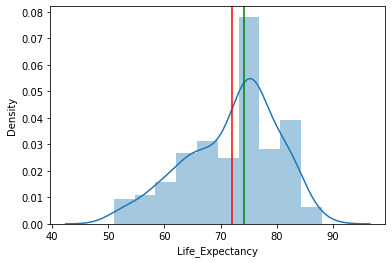

-0.5570055450291043
-0.322560114952835


In [ ]:
sns.distplot(df['Life_Expectancy'])
plt.axvline(df['Life_Expectancy'].mean(), color= 'red')
plt.axvline(df['Life_Expectancy'].median(), color= 'green')
plt.show()
print(df['Life_Expectancy'].skew())
print(df['Life_Expectancy'].kurt())

In [ ]:
# Left skewed data. # Platykurtic type kurtosis
# we can fill NaN with mean value as mean is lesser than median here.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


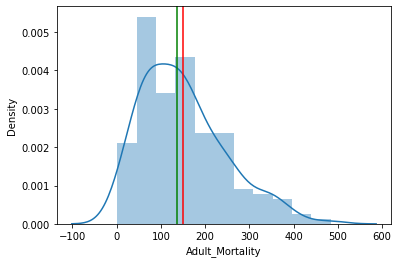

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


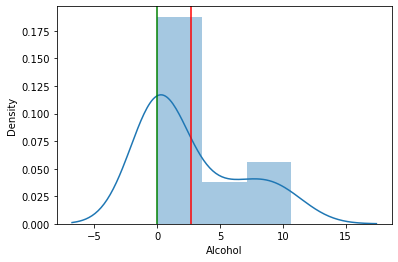

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


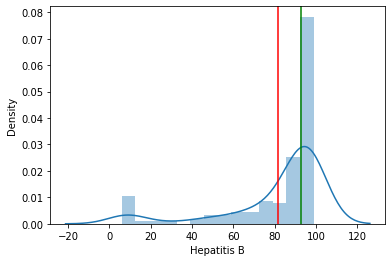

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


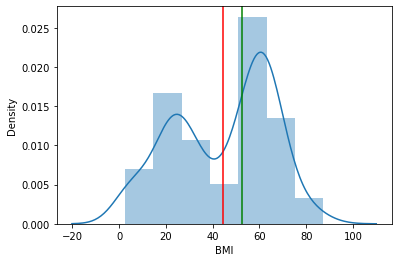

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


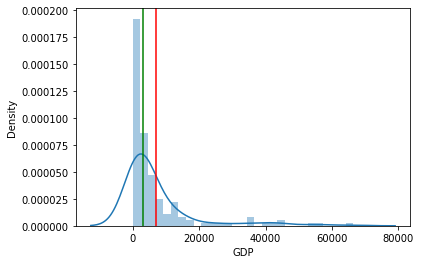

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


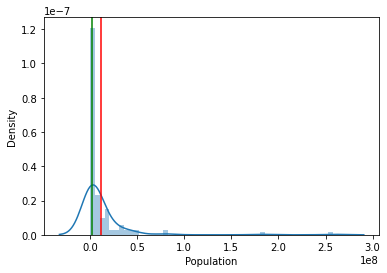

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


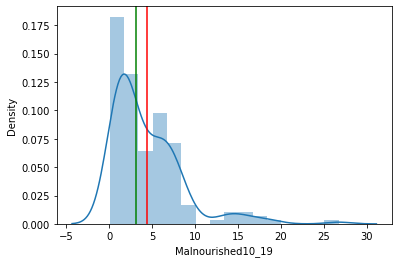

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


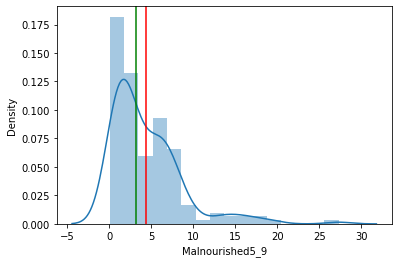

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


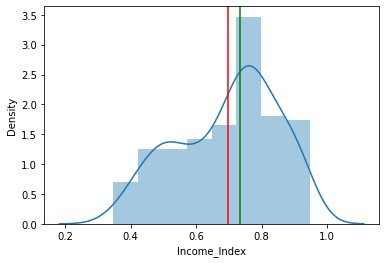

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


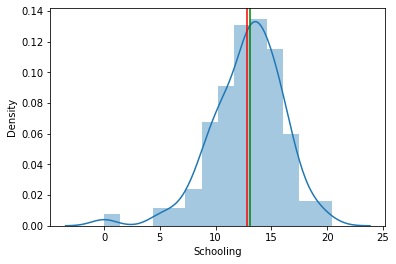

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


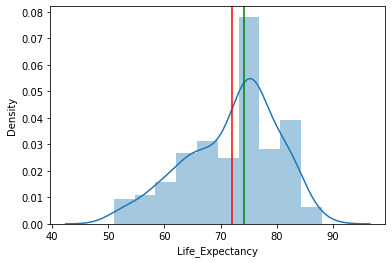

In [ ]:
for i in df.columns[3:]:
  if df[i].isna().sum() > 0:
    sns.distplot(df[i])
    plt.axvline(df[i].mean(), color= 'red')
    plt.axvline(df[i].median(), color= 'green')
    plt.show()

### looking at the distributions of the plots, we can say the following inferences:

 Adumt_mortality - Mean imputation 

 Alcohol- Mean imputation

 hepatitis B- Median imputation

 BMI- Mean imputation

 GDP - Median imputation

 Population - Median imputation

 Malnutritition_10_19 -  Median imputation

 Malnutritition_09 -  Median imputation

 Income- Median imputation

 Schooling- Mean imputation

 Life Expectancy - Median imputation


In [ ]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


In [ ]:
exp= df['Life_Expectancy']
df_n = df.copy()
df_n.drop({'Life_Expectancy'}, axis=1, inplace=True)

In [ ]:
dfn= df_n.iloc[:, 3:]

In [ ]:
dfn = dfn.fillna(dfn.median())

In [ ]:
exp.fillna(exp.median(), inplace=True)

In [ ]:
exp.isna().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# we can check based on significance level
import statsmodels.api as sm
xc= sm.add_constant(dfn)
md= sm.OLS(exp, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     78.86
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           1.57e-68
Time:                        03:51:18   Log-Likelihood:                -436.30
No. Observations:                 182   AIC:                             906.6
Df Residuals:                     165   BIC:                             961.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                52.9943      2.06

In [ ]:
# based on p values- yes- GDP, Diphtheria, Population are quite insignificant.

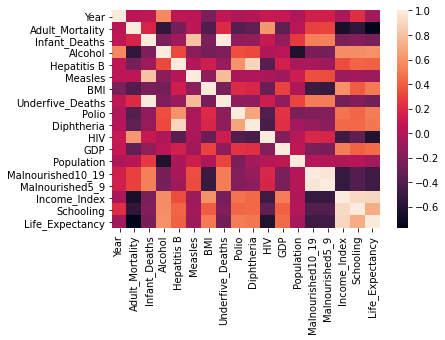

In [ ]:
sns.heatmap(df.corr())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
dfn['Year'] = df['Year']
dfn['status'] = df['Status']

In [ ]:
dfn = pd.get_dummies(data= dfn, columns=['Year', 'status'], drop_first=True)
dfn.head()

,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Year_2015,status_Developing
0,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,1
1,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,1,1
2,19.0,21,0.01,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,1,1
3,335.0,66,0.01,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,1,1
4,13.0,0,0.01,99.0,0,47.7,0,86,99,0.2,13566.954100,1977527.0,3.3,3.3,0.784,13.9,1,1


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
xc= sm.add_constant(dfn)
md= sm.OLS(exp, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     70.50
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           3.45e-67
Time:                        07:10:57   Log-Likelihood:                -434.85
No. Observations:                 182   AIC:                             907.7
Df Residuals:                     163   BIC:                             968.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                54.6325      2.54

In [ ]:
# we can do a Gold feld test.

sm.stats.diagnostic.het_goldfeldquandt(md.resid, md.model.exog)

(1.2287048480538365, 0.19214385047667032, 'increasing')

In [ ]:
# we fail to reject null hypothesis. 

# variance is constant across data

In [ ]:
md.resid.shape

(182,)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


In [ ]:
imm = ['Hepatitis B', 'Measles', 'Polio', 'Diphtheria']
df_imm = df[imm]
df_imm.head()

,Hepatitis B,Measles,Polio,Diphtheria
0,65.0,1154,6,65
1,99.0,0,99,99
2,95.0,63,95,95
3,64.0,118,7,64
4,99.0,0,86,99


In [ ]:
xc[imm]

,Hepatitis B,Measles,Polio,Diphtheria
0,65.0,1154,6,65
1,99.0,0,99,99
2,95.0,63,95,95
3,64.0,118,7,64
4,99.0,0,86,99
...,...,...,...,...
177,87.0,0,87,87
178,97.0,256,97,97
179,69.0,468,63,69
180,9.0,9,9,9


In [ ]:
import statsmodels.api as sm
rtr= sm.add_constant(xc[imm])
md= sm.OLS(exp, rtr).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     21.00
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           3.49e-14
Time:                        07:49:06   Log-Likelihood:                -597.26
No. Observations:                 182   AIC:                             1205.
Df Residuals:                     177   BIC:                             1221.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.6563      1.930     28.841      

In [ ]:
# Great results! We are getiing an R square of over 32 percent, Lets get rid of Measles and see.

imm.remove('Measles')

In [ ]:
imm

['Hepatitis B', 'Polio', 'Diphtheria']

In [ ]:
rt= sm.add_constant(xc[imm])
md= sm.OLS(exp, rt).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     27.47
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           1.20e-14
Time:                        07:50:11   Log-Likelihood:                -597.98
No. Observations:                 182   AIC:                             1204.
Df Residuals:                     178   BIC:                             1217.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.5279      1.929     28.787      

In [ ]:
# Interesting. Same. r sqaure. lets get rid of Hepatitis and see

In [ ]:
#imm.remove('Hepatitis B')
rt= sm.add_constant(xc[imm])
md= sm.OLS(exp, rt).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     40.39
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           3.34e-15
Time:                        07:46:49   Log-Likelihood:                -598.71
No. Observations:                 182   AIC:                             1203.
Df Residuals:                     179   BIC:                             1213.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.5229      1.931     28.750      0.0

In [ ]:
# SO basically only 2 variables- Polio and Diptheria are enough to get an R square of over 31.5%

In [ ]:
# Unexplained variance:

ss1 = np.sum((df['Life_Expectancy'].mean() - df['Life_Expectancy'])**2)
print(md.ess)
print(ss1)

3462.2221383372544
11134.818021978022


In [ ]:
ss1/md.ssr

1.4512452096844146

In [ ]:
(1 - md.rsquared)*100  # the unexplained varation of the model

68.90634286520459

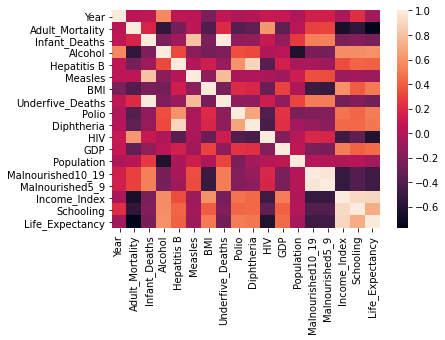

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Underfive_Deaths', 'Polio',
       'Diphtheria', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
mal = ['Malnourished10_19', 'Malnourished5_9']
rtr1= sm.add_constant(xc[mal])
md11= sm.OLS(exp, rtr1).fit()
print(md11.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     25.66
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           1.60e-10
Time:                        07:51:07   Log-Likelihood:                -609.67
No. Observations:                 182   AIC:                             1225.
Df Residuals:                     179   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.0391      0.75

In [ ]:
# although the coedd is high- the p value is showing considerable insignificance - even the r square is less. 

In [ ]:
# Expectency would be:

# Life expectancy (in years) = -76.0 - 0.38(x1) - 0.510(x2)

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Using OLS

rtr1= sm.add_constant(xc['Adult_Mortality'])
md11= sm.OLS(exp, rtr1).fit()
print(md11.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     268.9
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           1.45e-37
Time:                        07:55:09   Log-Likelihood:                -549.44
No. Observations:                 182   AIC:                             1103.
Df Residuals:                     180   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              81.8259      0.698    1

In [ ]:
# Good feature! alone explains 60 percent of the variation in data

In [ ]:
# Using Gradiant Descent

from scipy.optimize import minimize
minimize()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
     N = float(len(y))
     for i in range(epochs):
          y_current = (m_current * X) + b_current
          cost = sum([data**2 for data in (y-y_current)]) / N
          m_gradient = -(2/N) * sum(X * (y - y_current))
          b_gradient = -(2/N) * sum(y - y_current)
          m_current = m_current - (learning_rate * m_gradient)
          b_current = b_current - (learning_rate * b_gradient)
     return m_current, b_current, cost

# Work in progress

OverflowError: ignored

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(xc[['Hepatitis B', 'Measles', 'Polio', 'Diphtheria']], exp)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd.coef_

array([ 7.75642831e+11, -1.99270245e+12,  3.55298209e+11,  5.21383580e+11])

In [ ]:
xy= sm.add_constant(xc[['Hepatitis B', 'Measles', 'Polio', 'Diphtheria']])
model = sm.OLS(exp, xy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     21.00
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           3.49e-14
Time:                        09:42:06   Log-Likelihood:                -597.26
No. Observations:                 182   AIC:                             1205.
Df Residuals:                     177   BIC:                             1221.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.6563      1.930     28.841      

In [ ]:
a = list(sgd.coef_/1000000000000)
b= list(model.params[1:])
rr= pd.DataFrame({'sgd': a, 'Linear':b})
rr.head()

,sgd,Linear
0,0.775643,-0.052378
1,-1.992702,-0.000073
2,0.355298,0.103351
3,0.521384,0.145787


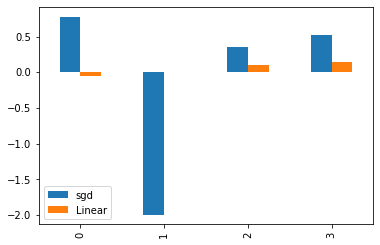

In [ ]:
rr.plot(kind='bar')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
xtr, xts, ytr, yts = train_test_split(xc, exp)

In [ ]:
xy= sm.add_constant(xtr)
model = sm.OLS(ytr, xy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     55.49
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           1.29e-48
Time:                        10:00:46   Log-Likelihood:                -322.74
No. Observations:                 136   AIC:                             683.5
Df Residuals:                     117   BIC:                             738.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                54.5688      3.05

In [ ]:
# testing set

xy= sm.add_constant(xts)
ypred = model.predict(xy)
from sklearn.metrics import r2_score

r2_score(yts, ypred)

0.8233123758496212

In [ ]:
# yes the model is overfitting slight on the traning data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Yes. 

xy= sm.add_constant(xtr)
model = sm.OLS(ytr, xy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     55.49
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           1.29e-48
Time:                        10:06:08   Log-Likelihood:                -322.74
No. Observations:                 136   AIC:                             683.5
Df Residuals:                     117   BIC:                             738.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                54.5688      3.05

In [ ]:
# highest contributing features are - Adult_Mortality, Infacnt- deaths, Income_Index, Hepatitis B 

In [ ]:
# we can analyze by looking at the coefficeints

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# lets check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

gt= pd.DataFrame()
gt['vars'] = xc.columns
gt['vif_score'] = [vif(xc.values, i) for i in range(xc.shape[1])]


In [ ]:
gt

,vars,vif_score
0,const,150.981848
1,Adult_Mortality,2.345130
2,Infant_Deaths,162.920206
3,Alcohol,1.105705
4,Hepatitis B,6.243168
5,Measles,4.256329
6,BMI,1.770225
7,Underfive_Deaths,141.643778
8,Polio,2.244110
9,Diphtheria,7.206809


In [ ]:
# features having high multicollinearity are- Infant_Deaths, Underfive_Deaths, Malnourished10_19, Malnourished5_9

In [ ]:
# none of the above features are contributing that much - coeff wise - so fairly said, model wont be disrupted that much after dropping these features

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
xc.head()

,const,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Year_2015,status_Developing
0,1.0,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,1
1,1.0,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,1,1
2,1.0,19.0,21,0.01,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,1,1
3,1.0,335.0,66,0.01,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,1,1
4,1.0,13.0,0,0.01,99.0,0,47.7,0,86,99,0.2,13566.954100,1977527.0,3.3,3.3,0.784,13.9,1,1


In [ ]:
imm= ['HIV', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria']

In [ ]:
# we can use a K-fold cross val coupled with a Lasso.
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
ar= Lasso(alpha= 1.5, max_iter=10000)
cv_ = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(ar, xc[imm], exp, scoring = 'r2', cv=cv_, n_jobs=-1)
print('RMSE is /n', np.mean(scores))

RMSE is /n 0.3871578143911168


In [ ]:
# with lasso we are getting a score of 23% - not that great. 

# lets see the significant features.

In [ ]:
las= Lasso(alpha=0.1, max_iter=100000).fit(xc[imm], exp)
xc[imm].iloc[:,las.coef_!=0]

,HIV,Hepatitis B,Measles,Polio,Diphtheria
0,0.1,65.0,1154,6,65
1,0.1,99.0,0,99,99
2,0.1,95.0,63,95,95
3,1.9,64.0,118,7,64
4,0.2,99.0,0,86,99
...,...,...,...,...,...
177,0.1,87.0,0,87,87
178,0.1,97.0,256,97,97
179,0.1,69.0,468,63,69
180,4.1,9.0,9,9,9


In [ ]:
las.coef_

array([-2.59503551e+00, -3.57548932e-02, -8.59473853e-05,  7.66260357e-02,
        8.43644730e-02])

In [ ]:
# So most important features taken by lasso are: HIV, Hepatitis B and Polio

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
  rrt= ['HIV', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria', 'Malnourished10_19',	'Malnourished5_9']
  las= Lasso(alpha=0.1, max_iter=100000).fit(xc[rrt], exp)

In [ ]:

ww = {i:k for i,k in zip(rrt, las.coef_)}

In [ ]:
sorted(ww, key=ww.get)

['HIV',
 'Malnourished5_9',
 'Malnourished10_19',
 'Hepatitis B',
 'Measles',
 'Polio',
 'Diphtheria']

In [ ]:
# The last few columns are insignificant - we can look that up with p values tho

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.linear_model import ElasticNet
el= ElasticNet(alpha= 0.1, l1_ratio=0.001, max_iter=10000).fit(xtr, ytr)

In [ ]:
ypr = el.predict(xts)
y_train_pr = el.predict(xtr)
print(np.sqrt(mean_squared_error(ytr,y_train_pr)), np.sqrt(mean_squared_error(yts,ypr)))

2.9571378088048985 4.4847130759524205


In [ ]:
# training set = 2.95

In [ ]:
# testing set = 4.48

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
las2= Lasso(alpha=0.5, max_iter=100000).fit(xtr, ytr)

In [ ]:
# features

In [ ]:
ww2 = {i:k for i,k in zip(xtr.columns, las2.coef_)}

In [ ]:
ww2

{'Adult_Mortality': -0.03872756010642552,
 'Alcohol': 0.0,
 'BMI': 0.020724904690072394,
 'Diphtheria': 0.0122737636202585,
 'GDP': 2.6386313441413518e-05,
 'HIV': -0.02340826008613188,
 'Hepatitis B': 0.02493115420252038,
 'Income_Index': 0.0,
 'Infant_Deaths': 0.11056194737435633,
 'Malnourished10_19': -0.17468285392180516,
 'Malnourished5_9': -0.0,
 'Measles': -6.813020370916965e-05,
 'Polio': 0.03160505904107566,
 'Population': 4.3398734382228155e-09,
 'Schooling': 0.9066473006731093,
 'Underfive_Deaths': -0.07981067220542704,
 'Year_2015': -0.0,
 'const': 0.0,
 'status_Developing': -0.0}

In [ ]:
sorted(ww2, key=ww2.get, reverse=True)

['Schooling',
 'Infant_Deaths',
 'Polio',
 'Hepatitis B',
 'BMI',
 'Diphtheria',
 'GDP',
 'Population',
 'const',
 'Alcohol',
 'Malnourished5_9',
 'Income_Index',
 'Year_2015',
 'status_Developing',
 'Measles',
 'HIV',
 'Adult_Mortality',
 'Underfive_Deaths',
 'Malnourished10_19']

In [ ]:
# influencing features are: Schooling, Infant_Deaths, Polio, Hepatitis B

<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.linear_model import Ridge

rr= {'alpha': [7,8,9,10,11]}

from sklearn.model_selection import KFold, GridSearchCV
ar = Ridge(max_iter=100000)
gs= GridSearchCV(ar, param_grid= rr, scoring= 'r2', cv=3)
gs.fit(xtr, ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.08317e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.91981e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.03808e-16): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.90836e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.8969e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlg

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000, normalize=False,
                             random_state=None, solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [7, 8, 9, 10, 11]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='r2', verbose=0)

In [ ]:
gs.best_params_

{'alpha': 11}

In [ ]:
# alpha was found the best value = 11

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.linear_model import Lasso

rr= {'alpha': [7,8,9,10,11]}

from sklearn.model_selection import KFold, GridSearchCV
ar = Lasso(max_iter=100000)
gs= GridSearchCV(ar, param_grid= rr, scoring= 'r2', cv=3)
gs.fit(xtr, ytr)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [7, 8, 9, 10, 11]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='r2', verbose=0)

In [ ]:
gs.best_params_

{'alpha': 11}

In [ ]:
# alpha was found the best value = 11

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
al = [0.1,0.5,1,1.5,2,2.5,3,3.5,4]
rr= {'l1_ratio': [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}


for i in al:
  ar = ElasticNet(alpha=i, max_iter=100000)
  gs= GridSearchCV(ar, param_grid= rr, scoring= 'r2', cv=3)
  gs.fit(xtr, ytr)
  yu= gs.predict(xts)
  print(np.sqrt(mean_squared_error(yts, yu)))

4.573074674605815
4.5235959350982435
4.395363551353943
4.269444765555342
4.210281695564108
4.189551576799217
4.19968139690739
4.235971126198242
4.29377285524309


In [ ]:
gs.best_params_

{'l1_ratio': 0.5}

In [ ]:
# or we can run a loop

rty = [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]

In [ ]:
# only testing on test set.


for i in al:
  for j in rty:
    ar = ElasticNet(alpha=i, l1_ratio=j, max_iter=100000).fit(xtr, ytr)
    rtu= ar.predict(xts)
    print('for alpha = {} and L1 ratio= {}, test score is {}'.format(i, j, mean_squared_error(yts, rtu)))

for alpha = 0.1 and L1 ratio= 0.5, test score is 20.4252750991415
for alpha = 0.1 and L1 ratio= 0.55, test score is 20.48132021895801
for alpha = 0.1 and L1 ratio= 0.6, test score is 20.5481776472229
for alpha = 0.1 and L1 ratio= 0.65, test score is 20.629982902596225
for alpha = 0.1 and L1 ratio= 0.7, test score is 20.73341816930991
for alpha = 0.1 and L1 ratio= 0.75, test score is 20.844220452233113
for alpha = 0.1 and L1 ratio= 0.8, test score is 20.86542996379818
for alpha = 0.1 and L1 ratio= 0.85, test score is 20.888278571640218
for alpha = 0.1 and L1 ratio= 0.9, test score is 20.913011979521077
for alpha = 0.5 and L1 ratio= 0.5, test score is 19.951863808135084
for alpha = 0.5 and L1 ratio= 0.55, test score is 20.003270089600925
for alpha = 0.5 and L1 ratio= 0.6, test score is 20.058121919095303
for alpha = 0.5 and L1 ratio= 0.65, test score is 20.116662800539338
for alpha = 0.5 and L1 ratio= 0.7, test score is 20.17916394460929
for alpha = 0.5 and L1 ratio= 0.75, test score is 

In [ ]:
# best hyper parameters are


# alpha = 0.1 and L1 ratio= 0.9, test score is 20.913011979521077

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
rr= {'l1_ratio': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}

In [ ]:
ar = ElasticNet(alpha=0.8, max_iter=100000)
gs= GridSearchCV(ar, param_grid= rr, scoring= 'r2', cv=3)
gs.fit(xtr, ytr)

GridSearchCV(cv=3, error_score=nan,
             estimator=ElasticNet(alpha=0.8, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=100000,
                                  normalize=False, positive=False,
                                  precompute=False, random_state=None,
                                  selection='cyclic', tol=0.0001,
                                  warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'l1_ratio': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
gs.best_params_

{'l1_ratio': 1}

In [ ]:
ar = ElasticNet(alpha=0.1, l1_ratio=1, max_iter=100000).fit(xtr, ytr)

In [ ]:
y1= ar.predict(xtr)
y2 = ar.predict(xts)

In [ ]:
#training score
print(r2_score(ytr, y1))

0.8613617395994658


In [ ]:
# test data

print(r2_score(yts, y2))

0.5718096510336483
